# Sales Analysis

### import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from itertools import combinations
from collections import Counter
from datetime import datetime

#### merge

In [2]:
df = pd.read_csv("/home/killerivy/Desktop/project2/Sales_Data/Sales_April_2019.csv")
#df.drop([1],inplace=True)
#df= df.reset_index(drop=True)
#df_copy= df.copy()
#df.to_csv("/home/killerivy/Desktop/project2/Sales_Data/Sales_April_2019.csv",index=False)


In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [4]:
files = [f for f in os.listdir("/home/killerivy/Desktop/project2/Sales_Data/")]
#files

In [5]:
all_df= pd.DataFrame()
for file in files:
    df = pd.read_csv("/home/killerivy/Desktop/project2/Sales_Data/"+file)
    df_copy=df.copy()
    all_df= pd.concat([all_df,df_copy])
all_df.to_csv("all_months.csv",index= False)
all_df.to_excel("all_months.xlsx",index= False)

### updated data

In [6]:
all_df_copy= all_df.copy()

In [7]:
all_df_copy.isna().sum()

#sorted(all_df_copy)
#all_df_copy['Order Date'].head()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

In [8]:
#all_df_copy = all_df_copy[all_df_copy['Order Date'].str[:2] == 'Or']
#all_df_copy

In [9]:
#all_df_copy = all_df_copy[all_df_copy['Order Date'].str[:2] != 'Or']

##### update dataframe as per required

In [10]:
#add month column
all_df_copy = all_df_copy[all_df_copy['Order Date'].str[:2] != 'Or']
all_df_copy['month']= (all_df_copy['Order Date']).str[:2]
all_df_copy.isna().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
month               544
dtype: int64

In [11]:
all_df_copy = all_df_copy.dropna(how="all")
all_df_copy.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
month               0
dtype: int64

In [12]:
all_df_copy['month']= all_df_copy['month'].astype('int64')

In [13]:
#making columns into correct datatypes
#they look numbers but are typecasted as string
all_df_copy['Quantity Ordered']=pd.to_numeric(all_df_copy['Quantity Ordered'])
all_df_copy['Price Each']=pd.to_numeric(all_df_copy["Price Each"])

In [14]:
all_df_copy.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [15]:
#add sales column
all_df_copy['sales']= all_df_copy["Quantity Ordered"] * all_df_copy["Price Each"]
all_df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


#### what was the best month for sales? how much was earned in that month?

In [16]:
 all_df_copy.groupby('month').sum()

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [17]:
results= all_df_copy.groupby('month').sum()

Text(0.5, 0, 'months')

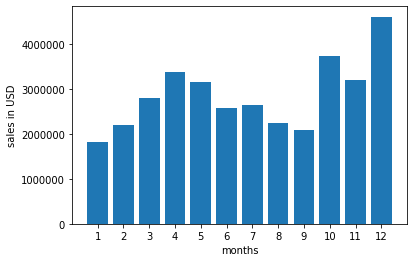

In [18]:
months= range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel("sales in USD")
plt.xlabel("months")

#### what city has highest number of sales

In [19]:
#add a city column

In [20]:
z = all_df_copy['Purchase Address'].apply(lambda x:x.split(',')[1])
y= all_df_copy['Purchase Address'].apply(lambda x:x.split(',')[2].split(' ')[1])
all_df_copy['city']= z+"("+y+")"
all_df_copy['city'] = all_df_copy['city'].astype("string")
all_df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas(TX)
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles(CA)
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City(NY)
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City(NY)
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles(CA)


In [21]:
all_df_copy.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
sales               float64
city                 string
dtype: object

In [22]:
results= all_df_copy.groupby('city').sum()
results

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471892e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


Text(0.5, 0, 'city')

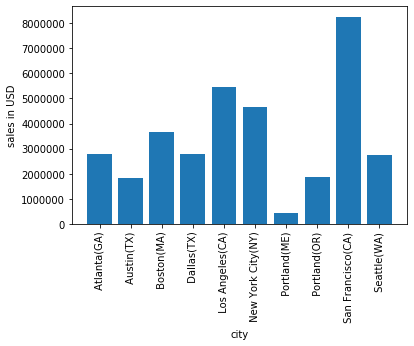

In [23]:
cities= [city for city,df in  all_df_copy.groupby('city')]
plt.bar(cities,results['sales'])
plt.xticks(cities,rotation = 90)
plt.ylabel("sales in USD")
plt.xlabel("city")

####  what time should we display advertisements to maximize likelihood of customer's buying product?

In [24]:
all_df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas(TX)
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles(CA)
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City(NY)
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City(NY)
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles(CA)


In [25]:
all_df_copy["Order Date"] = pd.to_datetime(all_df_copy["Order Date"])

In [26]:
all_df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas(TX)
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles(CA)
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City(NY)
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City(NY)
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles(CA)


In [27]:
all_df_copy["hour"] = all_df_copy["Order Date"].dt.hour
all_df_copy["minute"] = all_df_copy["Order Date"].dt.minute

In [28]:
all_df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas(TX),10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles(CA),17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City(NY),17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City(NY),22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles(CA),16,10


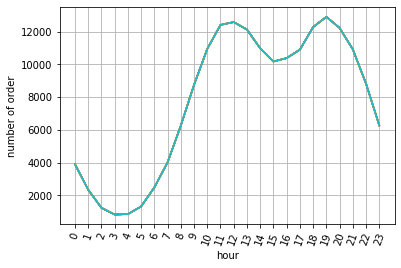

In [29]:
hours = [hour for hour,df in all_df_copy.groupby("hour")]
plt.plot(hours,all_df_copy.groupby(["hour"]).count())
plt.xticks(hours,rotation= 70)
plt.xlabel('hour')
plt.ylabel("number of order")
plt.grid()



#### what products are sold the most

In [30]:
df = all_df_copy[all_df_copy["Order ID"].duplicated(keep = False)]
df.head(30)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600.00,Los Angeles(CA),8,54
63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23.90,Los Angeles(CA),8,54
65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600.00,San Francisco(CA),4,53
66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11.95,San Francisco(CA),4,53
82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700.00,Los Angeles(CA),9,47
83,259438,Lightning Charging Cable,1,14.95,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,14.95,Los Angeles(CA),9,47
103,259458,34in Ultrawide Monitor,1,379.99,2019-10-08 09:08:00,"728 1st St, Portland, OR 97035",10,379.99,Portland(OR),9,8
104,259458,ThinkPad Laptop,1,999.99,2019-10-08 09:08:00,"728 1st St, Portland, OR 97035",10,999.99,Portland(OR),9,8
123,259477,LG Dryer,1,600.00,2019-10-12 09:38:00,"822 North St, San Francisco, CA 94016",10,600.00,San Francisco(CA),9,38
124,259477,AAA Batteries (4-pack),1,2.99,2019-10-12 09:38:00,"822 North St, San Francisco, CA 94016",10,2.99,San Francisco(CA),9,38


In [31]:
df["grouped"] = df.groupby("Order ID")['Product'].transform(lambda x :','.join(x))
df.head()

/home/killerivy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute,grouped
62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600.00,Los Angeles(CA),8,54,"Google Phone,USB-C Charging Cable"
63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23.90,Los Angeles(CA),8,54,"Google Phone,USB-C Charging Cable"
65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600.00,San Francisco(CA),4,53,"Google Phone,USB-C Charging Cable"
66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11.95,San Francisco(CA),4,53,"Google Phone,USB-C Charging Cable"
82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700.00,Los Angeles(CA),9,47,"iPhone,Lightning Charging Cable"


In [32]:
df = df[["Order ID","grouped"]].drop_duplicates()
df.head()

,Order ID,grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"


In [36]:
count = Counter()
for row in df["grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common():
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

####  what  product sold the most ? why

([<matplotlib.axis.XTick at 0x7f50c8f082d0>,
 <a list of 19 Text xticklabel objects>)

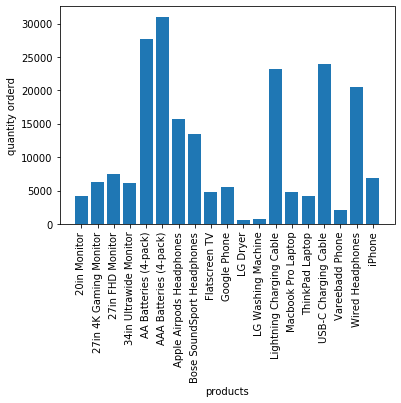

In [63]:
product_group =all_df_copy.groupby('Product')[['Quantity Ordered','Price Each']]
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('quantity orderd')
plt.xlabel('products')
plt.xticks(products,rotation=90)

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

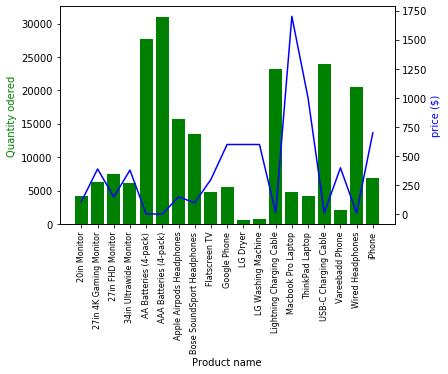

In [81]:
prices = all_df_copy.groupby('Product').mean()["Price Each"]

fig,ax1 = plt.subplots()
ax2= ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity odered',color="g")
ax2.set_ylabel('price ($)', color = 'b')
ax1.set_xticklabels(products,rotation = 90,size= 8)
